------------------------------Problem 1:------------------------------
F 0.2
constant 0.1
Imprimiendo a la matriz A: [[ 1.   0.   0.   0.   0. ]
 [-0.2  1.4 -0.2  0.   0. ]
 [ 0.  -0.2  1.4 -0.2  0. ]
 [ 0.   0.  -0.2  1.4 -0.2]
 [ 0.   0.   0.   0.   1. ]]
Time step= 0 ,  time= 0.0 , 0.0  %
Time step=  1 ,  time= 0.05 , 50.0  %
Time step=  2 ,  time= 0.1 , 100.0  %
------------------------------Problem 2a:------------------------------
F 0.062499999999999986
u(x,t)  [ 0.00000000e+00  1.59477687e-06 -2.58040319e-06  2.58040319e-06
 -1.59477687e-06  0.00000000e+00] for t=  0.5


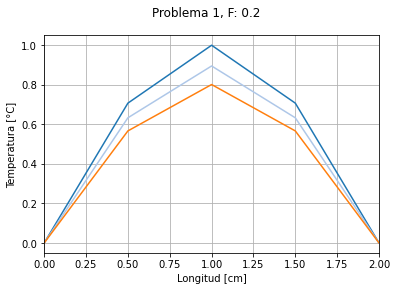

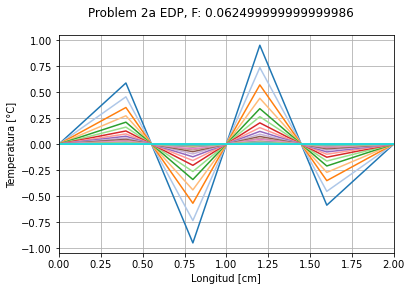

------------------------------Problem 2b:------------------------------
F 3.1249999999999996
u(x,t)  [ 0.         -6.05792419  9.80192724 -9.80192724  6.05792419  0.        ] for t=  0.5


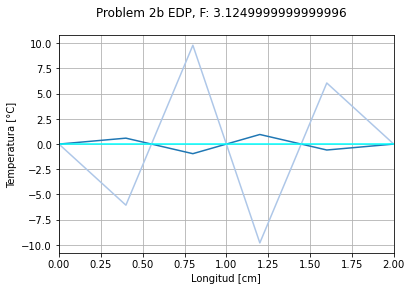

------------------------------Problem 3:------------------------------
F 0.506605918211689
u(x,t)  [0.         0.18581972 0.35345011 0.48648234 0.57189429 0.60132525
 0.57189429 0.48648234 0.35345011 0.18581972 0.        ] for t=  0.5


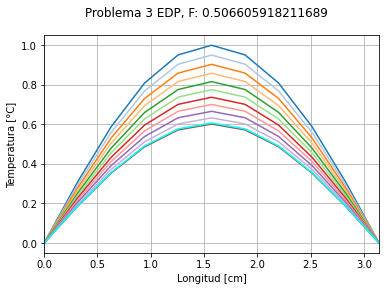

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from lib_funciones_generales import*
from lib_funciones_particulares2 import*

# Euler's Method

def euler(t0,tn,n,y0):
    h = abs(tn-t0)/n
    t = linspace(0,tn,n+1)
    y = zeros(n+1)
    y[0] = y0
    for k in range(0,n):
        y[k+1] = y[k] + h*f(t[k],y[k]) #Forward Euler
    return y

# Runge Kutta method

def RK4(t0,tn,n,y0):
    h = abs(tn-t0)/n
    t = linspace(t0,tn,n+1)
    y = zeros(n+1)
    y[0] = y0
    for i in range(0,n):
        K1 = f(t[i],y[i])
        K2 = f(t[i]+h/2,y[i]+K1*h/2)
        K3 = f(t[i]+h/2,y[i]+K2*h/2)
        K4 = f(t[i]+h,y[i]+K3*h)
        y[i+1] = y[i] + h*(K1+2*K2+2*K3+K4)/6
    return y
########################################################Problem 1
print("-"*30+"Problem 1:"+"-"*30)
def I(x):
    z=np.sin(((np.pi)/2)*x)
    return z
def sol(t,t0,y0):
    return np.exp(-(((np.pi)**2)/4)*t0)*np.sin(((np.pi)/2)*y0)
K = 1
L = 2
Nx = 4  
dx = L/Nx ##### h
T = 0.1
Nt = 2
dt = T/Nt ####### k
F = dt*K/dx**2
print('F', F)
ans = solver_BE_simple(I, K, L, dt, F, T, 0, 0)
u = ans[0]
x = ans[1]
t = ans[2]
cpu = ans[3]
u_array = ans[4]
#print('Table:', u_array)
#print('t:', t)
#print('u(x,t)', u_array[1000])
nt = Nt
timet = t
y_time = u_array
x_sec_min = 0
x_sec_max = L
nx = Nx
xlab = 'Longitud [cm]'
ylab = 'Temperatura [°C]'
fig_title = 'Problema 1, F: '+str(F)
legend = False
figure1 = XYplot_profiles(nt, timet, y_time, x_sec_min, x_sec_max, nx, xlab, ylab, fig_title, legend)
################################################## problem 2a
print("-"*30+"Problem 2a:"+"-"*30)
def I(x):
    z = np.sin(2*(np.pi)*x)
    return z
def sol(t,t0,y0):
    return np.exp(-4*((np.pi)**2)*t0)*np.sin(2*np.pi*y0)
K = 1
L = 2
dx = 0.4 ##### h
Nx = int(L/dx)
T = 0.5
dt = 0.01 ####### k
Nt = int(T/dt)
F = dt*K/dx**2 
print('F', F)
ans = solver_FE_simple(I, K, L, dt, F, T, 0, 0)
u = ans[0]
x = ans[1]
t = ans[2]
cpu = ans[3]
u_array = ans[4]
nt = Nt 
time = t
y_time = u_array 
x_sec_min = 0
x_sec_max = L
nx = Nx 
xlab = 'Longitud [cm]'
ylab = 'Temperatura [°C]'
fig_title = 'Problem 2a EDP, F: '+str(F)
legend = False
figure1 = XYplot_profiles(nt, time, y_time, x_sec_min, x_sec_max, nx, xlab, ylab, fig_title, legend)
for i in range(0, Nt+1):
    #print('i', i)
    if t[i]==0.5:
        print('u(x,t) ', u_array[i], 'for t= ', t[i])
        fig_title = 'Solución para t= '+str(t[i])
        y0 = np.linspace(0, L, Nx+1)
        usol = sol(t,0.5,y0)
        plt.plot(y0,usol,color ='cyan',label='Exact')
        plt.show()
############################################################### problem 2b
print("-"*30+"Problem 2b:"+"-"*30)
def I(x):
    z = np.sin(2*(np.pi)*x)
    return z
#analytic solution to the IVP y’ = f(t,y), y(t0)=y0
def sol(t,t0,y0):
    return np.exp(-4*((np.pi)**2)*t0)*np.sin(2*np.pi*y0)
L = 2
dx = 0.4 ##### h
Nx = int(L/dx)
T = 0.5
dt = 0.5 ####### k
Nt = int(T/dt)
F = dt*K/dx**2 
print('F', F)
ans = solver_FE_simple(I, K, L, dt, F, T, 0, 0)
u = ans[0]
x = ans[1]
t = ans[2]
cpu = ans[3]
u_array = ans[4]
#print('Table:', u_array)
#print('t:', t)
#print('u(x,t)', u_array[1000])
nt = Nt 
time = t
y_time = u_array 
x_sec_min = 0
x_sec_max = L
nx = Nx 
xlab = 'Longitud [cm]'
ylab = 'Temperatura [°C]'
fig_title = 'Problem 2b EDP, F: '+str(F)
legend = False
figure1 = XYplot_profiles(nt, time, y_time, x_sec_min, x_sec_max, nx, xlab, ylab, fig_title, legend)
for i in range(0, Nt+1):
    #print('i', i)
    if t[i]==0.5:
        print('u(x,t) ', u_array[i], 'for t= ', t[i])
        fig_title = 'Solución para t= '+str(t[i])
        y0 = np.linspace(0, L, Nx+1)
        usol = sol(t,0.5,y0)
        plt.plot(y0,usol,color ='cyan',label='Exact')
        plt.show()
############################################################### problem 3
print("-"*30+"Problem 3:"+"-"*30)
def I(x):
    z = np.sin(x)
    return z
#analytic solution to the IVP y’ = f(t,y), y(t0)=y0
def sol(t,t0,y0):
    return np.exp(-t0)*np.sin(y0)
K = 1
L = np.pi 
dx = np.pi/10 ##### h
Nx = int(L/dx)
T = 0.5
dt = 0.05 ####### k
Nt = int(T/dt)
F = dt*K/dx**2 
print('F', F)
ans = solver_FE_simple(I, K, L, dt, F, T, 0, 0)
u = ans[0]
x = ans[1]
t = ans[2]
cpu = ans[3]
u_array = ans[4]
nt = Nt 
time = t
y_time = u_array 
x_sec_min = 0
x_sec_max = L
nx = Nx 
xlab = 'Longitud [cm]'
ylab = 'Temperatura [°C]'
fig_title = 'Problema 3 EDP, F: '+str(F)
legend = False
figure1 = XYplot_profiles(nt, time, y_time, x_sec_min, x_sec_max, nx, xlab, ylab, fig_title, legend)
for i in range(0, Nt+1):
    #print('i', i)
    if t[i]==0.5:
        print('u(x,t) ', u_array[i], 'for t= ', t[i])
        fig_title = 'Solución para t= '+str(t[i])
        y0 = np.linspace(0, L, Nx+1)
        usol = sol(t,0.5,y0)
        plt.plot(y0,usol,color ='cyan',label='Exact')
        plt.show()